<a href="https://colab.research.google.com/github/JozJozmin/Global-Terrorism-Database-GTD---EDA/blob/main/Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Global Terrorism Database (GTD) - Exploratory Data Analysis**

In [1]:
!pip install geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
### importing required libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from geopy.geocoders import Nominatim

In [4]:
### Setting plotting background
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 11
plt.rcParams['figure.facecolor'] = '#00000000'

In [5]:
import warnings
warnings.filterwarnings("ignore")

##   **1. Data Preparation and Cleaning** <br>

*   Loading the dataset into pandas dataframe. <br>
*   Checking the info. about data and columns 
*   Feature selection 
*   Fixing the missing & incorrect values.







In [6]:
### mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
### reading the csv file into colab 
GTA_data  = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Team Capstone Projects/1. EDA/Global Terrorism Data.csv',encoding = "ISO-8859-1")

In [8]:
### creating a copy of orginal data 
data = GTA_data.copy()

In [9]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


#### **Checking the info. about data and columns**

In [10]:
data.shape

(181691, 135)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [12]:
list(data.columns)

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

In [13]:
""" Since the data consists of 135 feature columns I am checking the amount of missing/null values for each features which consists of 
                    more than  30% of missing values.  """
data.isna().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [61]:
###  Percentage of missing values per columns
Missing_values_percent = ((data.isna().sum()/data.shape[0])*100)
Missing_values_percent.sort_values(ascending=False)[:50]

gsubname3           99.988992
weapsubtype4_txt    99.961473
weapsubtype4        99.961473
weaptype4           99.959822
weaptype4_txt       99.959822
claimmode3          99.926799
claimmode3_txt      99.926799
gsubname2           99.911938
claim3              99.824978
guncertain3         99.823877
gname3              99.821675
divert              99.821675
attacktype3         99.764435
attacktype3_txt     99.764435
ransomnote          99.717102
ransompaidus        99.696187
ransomamtus         99.690133
claimmode2          99.660963
claimmode2_txt      99.660963
ransompaid          99.574002
corp3               99.435305
targsubtype3        99.396228
targsubtype3_txt    99.396228
natlty3_txt         99.368708
natlty3             99.368708
target3             99.353298
targtype3           99.352747
targtype3_txt       99.352747
ransomamt           99.256980
weapsubtype3_txt    99.068198
weapsubtype3        99.068198
weaptype3_txt       98.974633
weaptype3           98.974633
claim2    

In [15]:
print(f'The number of columns which have more than 30% of null values are:{ len(Missing_values_percent [Missing_values_percent >= 30])}')

 The number of columns which have more than 30% of null values are:87


In [16]:
#### name of columns that consists of less than 30% of null values
Missing_values_percent [Missing_values_percent <= 30].index

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
       'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt',
       'gname', 'guncertain1', 'individual', 'weaptype1', 'weaptype1_txt',
       'weapsubtype1', 'weapsubtype1_txt', 'nkill', 'nwound', 'property',
       'ishostkid', 'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

In [17]:
#### We are dropping all the columns that consits of more than 30% of null values.  
# perc = 30
# thresh_count =  int(((100-perc)/100)*data.shape[0] + 1)
# data.dropna(axis=1, thresh=thresh_count,inplace = True)

In [18]:
# data.columns

#### Feature Selections

In [19]:
###  Selecting only required features from the above data for further analysis 
keep_cols = ['eventid', 'iyear', 'imonth', 'iday', 'extended','country_txt','region_txt','city', 'latitude',
       'longitude','success','attacktype1_txt', 'targtype1_txt','corp1', 'target1','natlty1_txt','targsubtype1_txt',
       'gname','weaptype1_txt','nkill','nwound','property']

### creating a new dataframe with selected features 
data_new = data[keep_cols]

In [20]:
### Updating the headers
data_new.rename(columns = {'iyear':'year','imonth':'month','iday':'day','country_txt':'country_name','region_txt':'region',
                           'attacktype1_txt':'attack_type','targtype1_txt':'victim_cata','target1':'specific_victim','targsubtype1_txt':'victim_subtype_cata',
                           'corp1':'entity_name','natlty1_txt':'victim_nationaliy','gname':'perpetrator_group','weaptype1_txt':'weapon','nkill':'num_fatalities',
                           'nwound':'num_injured'},inplace = True)

In [21]:
data_new.head()

,eventid,year,month,day,extended,country_name,region,city,latitude,longitude,...,victim_cata,entity_name,specific_victim,victim_nationaliy,victim_subtype_cata,perpetrator_group,weapon,num_fatalities,num_injured,property
0,197000000001,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,...,Private Citizens & Property,NaN,Julio Guzman,Dominican Republic,Named Civilian,MANO-D,Unknown,1.0,0.0,0
1,197000000002,1970,0,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,...,Government (Diplomatic),Belgian Ambassador Daughter,"Nadine Chaval, daughter",Belgium,"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown,0.0,0.0,0
2,197001000001,1970,1,0,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,...,Journalists & Media,Voice of America,Employee,United States,Radio Journalist/Staff/Facility,Unknown,Unknown,1.0,0.0,0
3,197001000002,1970,1,0,0,Greece,Western Europe,Athens,37.997490,23.762728,...,Government (Diplomatic),NaN,U.S. Embassy,United States,Embassy/Consulate,Unknown,Explosives,NaN,NaN,1
4,197001000003,1970,1,0,0,Japan,East Asia,Fukouka,33.580412,130.396361,...,Government (Diplomatic),NaN,U.S. Consulate,United States,Embassy/Consulate,Unknown,Incendiary,NaN,NaN,1


### Missing Values

In [22]:
### Missing values
missing_values = ((data_new.isna().sum()/data_new.shape[0])*100).sort_values(ascending= False)
missing_values

entity_name            23.418882
num_injured             8.977330
victim_subtype_cata     5.709144
num_fatalities          5.676120
longitude               2.508104
latitude                2.507554
victim_nationaliy       0.858050
specific_victim         0.350045
city                    0.238867
eventid                 0.000000
weapon                  0.000000
perpetrator_group       0.000000
attack_type             0.000000
victim_cata             0.000000
year                    0.000000
success                 0.000000
region                  0.000000
country_name            0.000000
extended                0.000000
day                     0.000000
month                   0.000000
property                0.000000
dtype: float64

In [23]:
data_new[['num_injured','num_fatalities']] = data_new[['num_injured','num_fatalities']].fillna(method='ffill')
data_new[['entity_name','specific_victim','victim_nationaliy']] =data_new[['entity_name','specific_victim','victim_nationaliy']].fillna('Unknown')
data_new['victim_subtype_cata'] = data_new['victim_subtype_cata'].fillna('Unnamed Civilian/Unspecified')

In [24]:
((data_new.isna().sum()/data_new.shape[0])*100).sort_values(ascending= False)

longitude              2.508104
latitude               2.507554
city                   0.238867
eventid                0.000000
entity_name            0.000000
num_injured            0.000000
num_fatalities         0.000000
weapon                 0.000000
perpetrator_group      0.000000
victim_subtype_cata    0.000000
victim_nationaliy      0.000000
specific_victim        0.000000
attack_type            0.000000
victim_cata            0.000000
year                   0.000000
success                0.000000
region                 0.000000
country_name           0.000000
extended               0.000000
day                    0.000000
month                  0.000000
property               0.000000
dtype: float64

In [25]:
data_new[['longitude','latitude','city']]

,longitude,latitude,city
0,-69.951164,18.456792,Santo Domingo
1,-99.086624,19.371887,Mexico city
2,120.599741,15.478598,Unknown
3,23.762728,37.997490,Athens
4,130.396361,33.580412,Fukouka
...,...,...,...
181686,45.385034,2.359673,Ceelka Geelow
181687,35.942679,35.407278,Jableh
181688,124.437908,6.900742,Kubentog
181689,93.940430,24.798346,Imphal


In [26]:
data_new[(data_new['longitude'].isna()== False) & (data_new['latitude'].isna()== False) & (data_new['city'] == 'Unknown')].head()

,eventid,year,month,day,extended,country_name,region,city,latitude,longitude,...,victim_cata,entity_name,specific_victim,victim_nationaliy,victim_subtype_cata,perpetrator_group,weapon,num_fatalities,num_injured,property
2,197001000001,1970,1,0,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,...,Journalists & Media,Voice of America,Employee,United States,Radio Journalist/Staff/Facility,Unknown,Unknown,1.0,0.0,0
705,197102080002,1971,2,8,0,Iran,Middle East & North Africa,Unknown,37.146795,49.536102,...,Police,Unknown,Geudarmerie Post,Iran,"Police Building (headquarters, station, school)",Unknown,Firearms,0.0,0.0,1
1007,197109090002,1971,9,9,0,United Kingdom,Western Europe,Unknown,54.552254,-6.086832,...,Military,British Army,"David Stewardson, 29",Great Britain,"Military Personnel (soldiers, troops, officers...",Irish Republican Army (IRA),Explosives,1.0,0.0,1
1085,197111200002,1971,11,20,0,Taiwan,East Asia,Unknown,23.583333,119.583330,...,Airports & Aircraft,Unknown,China Airlines Caravelle en route Taipei to Ho...,China,Aircraft (not at an airport),Unknown,Explosives,25.0,0.0,1
1222,197203280001,1972,3,28,0,Philippines,Southeast Asia,Unknown,17.092014,121.965256,...,Military,Unknown,USAF Helicopter,United States,Military Aircraft,Unknown,Firearms,0.0,0.0,1


In [27]:
x = data_new[(data_new['longitude'].isna()== False) & (data_new['latitude'].isna()== False) & (data_new['city'] == 'Unknown')][['longitude','latitude','city']].head(20)
x

,longitude,latitude,city
2,120.599741,15.478598,Unknown
705,49.536102,37.146795,Unknown
1007,-6.086832,54.552254,Unknown
1085,119.583330,23.583333,Unknown
1222,121.965256,17.092014,Unknown
1291,-6.492314,54.787715,Unknown
1296,-6.492314,54.787715,Unknown
1332,-6.492314,54.787715,Unknown
1481,-6.361129,54.201137,Unknown
1720,39.782691,15.027339,Unknown


In [28]:
geolocator = Nominatim(user_agent="geoapiExercises")

In [29]:
def update_city(row):
  Longitude = str(row['longitude'])
  Latitude = str(row['latitude'])
  location = geolocator.reverse(Latitude+","+Longitude, exactly_one=True)
  row['city'] = row['city'].replace('Unknown', str(location))
  return row['city']

In [57]:
# x.apply(update_city , axis = 1)

In [56]:
# def update_city(row):
#   Longitude = str(row['longitude'])
#   Latitude = str(row['latitude'])
#   location = geolocator.reverse(Latitude+","+Longitude, exactly_one=True)
#   address = location.raw['address']
#   city = address.get('state', '')
#   row['city'] = city
#   #row['city'] = row['city'].replace('Unknown', str(location))
#   return row['city']

In [55]:
# x.apply(update_city , axis = 1)

In [54]:
# def city_state_country(row):
#     coord = f"{row['latitude']}, {row['longitude']}"
#     location = geolocator.reverse(coord, exactly_one=True)
#     address = location.raw['address']
#     city = address.get('city', '')
#     row['city'] = city
#     return row

# df = x.apply(city_state_country, axis=1)
# print(df)

In [ ]:
# https://datascientyst.com/reverse-geocoding-latitude-longitude-city-country-python-pandas/

In [37]:
data.city.value_counts()

Unknown      9775
Baghdad      7589
Karachi      2652
Lima         2359
Mosul        2265
             ... 
Hotwag          1
Ostend          1
Balughata       1
Jikoyi          1
Kubentog        1
Name: city, Length: 36674, dtype: int64

In [38]:
#data_new[(data_new['longitude'] != np.nan) & (data_new['latitude'] != np.nan) & (data_new['city'] == 'Unknown') ]

In [39]:
((data_new.isna().sum()/data_new.shape[0])*100).sort_values(ascending= False)

longitude              2.508104
latitude               2.507554
city                   0.238867
eventid                0.000000
entity_name            0.000000
num_injured            0.000000
num_fatalities         0.000000
weapon                 0.000000
perpetrator_group      0.000000
victim_subtype_cata    0.000000
victim_nationaliy      0.000000
specific_victim        0.000000
attack_type            0.000000
victim_cata            0.000000
year                   0.000000
success                0.000000
region                 0.000000
country_name           0.000000
extended               0.000000
day                    0.000000
month                  0.000000
property               0.000000
dtype: float64

In [40]:
data_new.describe(include = 'all')

,eventid,year,month,day,extended,country_name,region,city,latitude,longitude,...,victim_cata,entity_name,specific_victim,victim_nationaliy,victim_subtype_cata,perpetrator_group,weapon,num_fatalities,num_injured,property
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691,181691,181257,177135.000000,1.771340e+05,...,181691,181691,181691,181691,181691,181691,181691,181691.000000,181691.000000,181691.000000
unique,NaN,NaN,NaN,NaN,NaN,205,12,36674,NaN,NaN,...,22,33238,86006,216,112,3537,12,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Iraq,Middle East & North Africa,Unknown,NaN,NaN,...,Private Citizens & Property,Unknown,Unknown,Iraq,Unnamed Civilian/Unspecified,Unknown,Explosives,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,24636,50474,9775,NaN,NaN,...,43511,58906,6554,24113,21969,82782,92426,NaN,NaN,NaN
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,NaN,NaN,NaN,23.498343,-4.586957e+02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.488995,3.147696,-0.544556
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,NaN,NaN,NaN,18.569242,2.047790e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.942602,34.582571,3.122889
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,-53.154613,-8.618590e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,NaN,NaN,NaN,11.510046,4.545640e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,NaN,NaN,NaN,31.467463,4.324651e+01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,NaN,NaN,NaN,34.685087,6.871033e+01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,1.000000


### Updating incorrect values

In [41]:
### checking out the columns that contains 0 values for day and month 
data_new[(data_new.month == 0) | (data_new.day ==0)].head()

,eventid,year,month,day,extended,country_name,region,city,latitude,longitude,...,victim_cata,entity_name,specific_victim,victim_nationaliy,victim_subtype_cata,perpetrator_group,weapon,num_fatalities,num_injured,property
1,197000000002,1970,0,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,...,Government (Diplomatic),Belgian Ambassador Daughter,"Nadine Chaval, daughter",Belgium,"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown,0.0,0.0,0
2,197001000001,1970,1,0,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,...,Journalists & Media,Voice of America,Employee,United States,Radio Journalist/Staff/Facility,Unknown,Unknown,1.0,0.0,0
3,197001000002,1970,1,0,0,Greece,Western Europe,Athens,37.997490,23.762728,...,Government (Diplomatic),Unknown,U.S. Embassy,United States,Embassy/Consulate,Unknown,Explosives,1.0,0.0,1
4,197001000003,1970,1,0,0,Japan,East Asia,Fukouka,33.580412,130.396361,...,Government (Diplomatic),Unknown,U.S. Consulate,United States,Embassy/Consulate,Unknown,Incendiary,1.0,0.0,1
96,197003000001,1970,3,0,0,Philippines,Southeast Asia,Manila,14.596051,120.978666,...,Government (Diplomatic),Unknown,U.S. Embassy,United States,Embassy/Consulate,Unknown,Explosives,0.0,0.0,1


In [42]:
### replacing month 0 values with month 12
data_new.month.replace(0,12 , inplace = True)

### replacing day 0 values with day 31
data_new.day.replace(0,31, inplace = True)

## Exploratory Analysis and Visualisation

In [43]:
### total number of terrorist attacks per year basesd on success and not success
plt.rcParams['figure.figsize'] = (20, 5)
fig = px.histogram(data_new, 
                   x='year', 
                   color = 'success', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Number of terrorist attack per year')
fig.update_layout(bargap=0.1)
fig.update_xaxes(tickangle= -90)
fig.show()

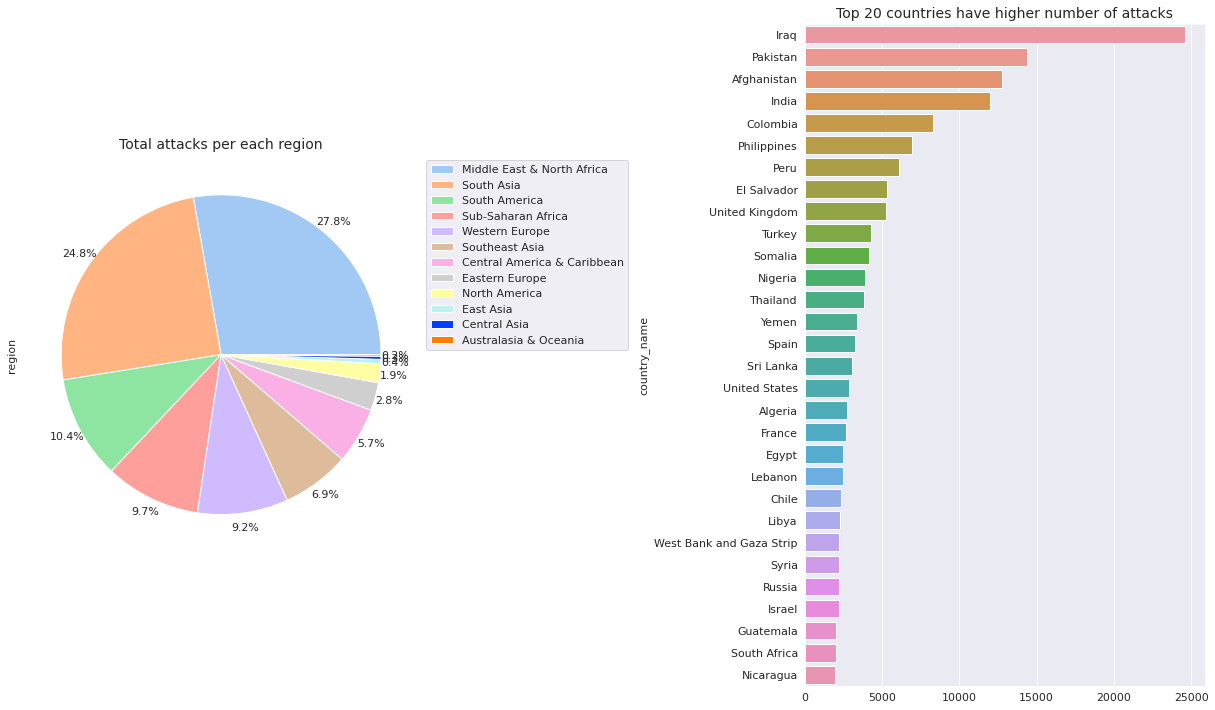

In [44]:
### Attacks per regions and top 20 countries where the terrorist attacks happended

plt.figure(figsize=(17, 10))
ax1 = plt.subplot(121)
colors = sns.color_palette('pastel')[0:10]+sns.color_palette('bright')[0:2]
data_new.region.value_counts().plot(kind='pie',autopct="%.1f%%",pctdistance= 1.09, colors = colors,labels = None)
                                              # ,rotatelabels=True,labeldistance=1)
ax1.legend(labels =data_new.region.value_counts().index, bbox_to_anchor = (1,1),loc = 2)
ax1.set_title('Total attacks per each region',size = 14)
ax2 = plt.subplot(122)
sns.barplot(x =data_new.groupby('country_name').eventid.count().sort_values(ascending=False)[:30].values , 
            y = data_new.groupby('country_name').eventid.count().sort_values(ascending=False)[:30].index )
ax2.set_title('Top 20 countries have higher number of attacks',size = 14)
plt.tight_layout()
plt.show()

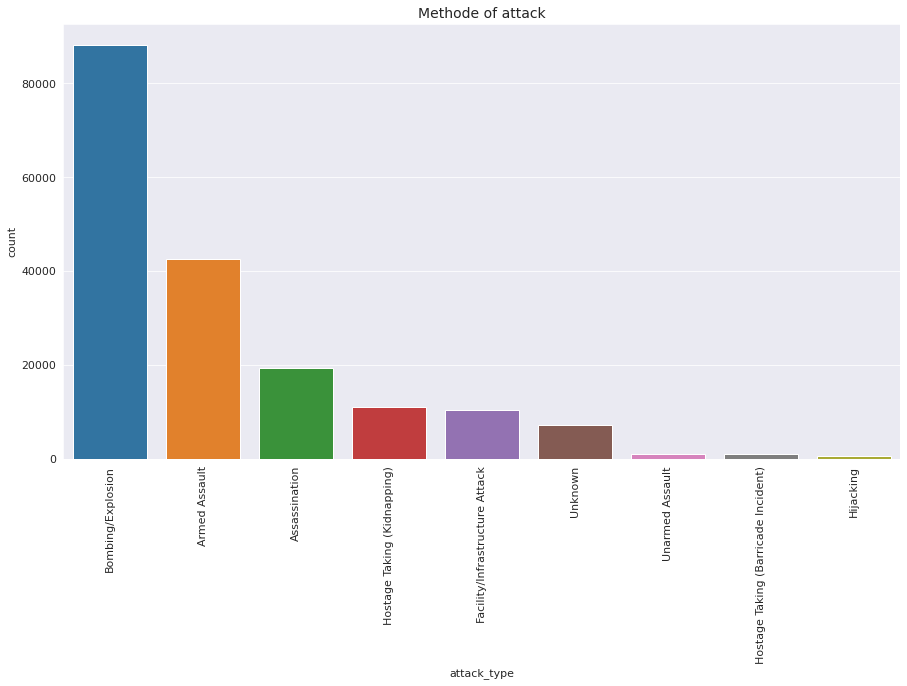

In [45]:
### Methode of attack
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(x="attack_type", data= data_new, order=data_new.attack_type.value_counts().index)
plt.title('Methode of attack', size = 14)
plt.xticks(rotation=90)
plt.show()

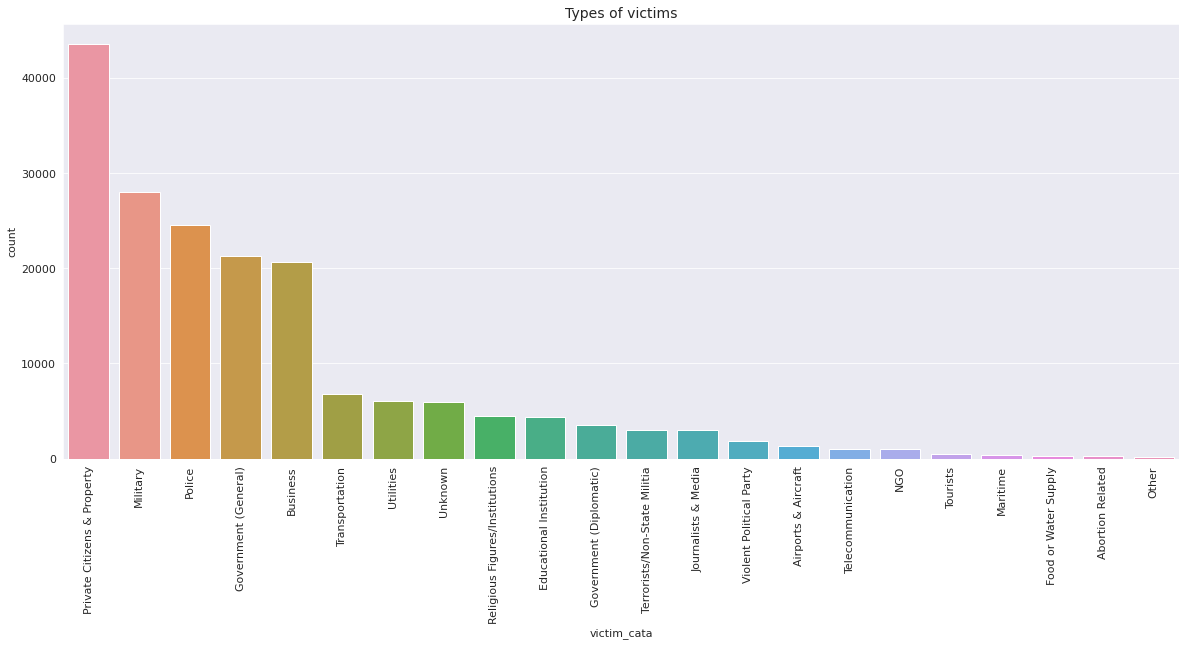

In [46]:
### types of victims of attack
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(x="victim_cata", data= data_new, order=data_new.victim_cata.value_counts().index)
plt.title('Types of victims', size = 14)
plt.xticks(rotation=90)
plt.show()

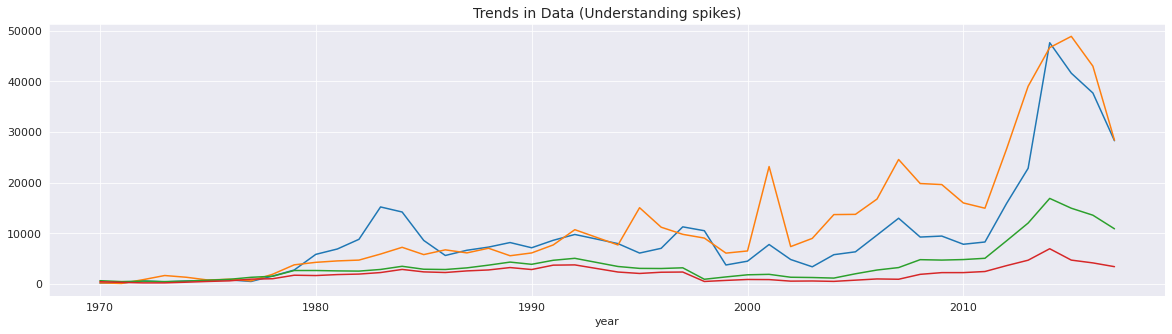

In [47]:
plt.rcParams['figure.figsize'] = (20, 5)
plt.title('Trends in Data (Understanding spikes)', size = 14)
data_new.groupby('year')['num_fatalities'].sum().plot()
data_new.groupby('year')['num_injured'].sum().plot()
data_new.groupby('year')['eventid'].count().plot()
data_new[data_new.property  == 1].groupby('year')['property'].sum().plot()

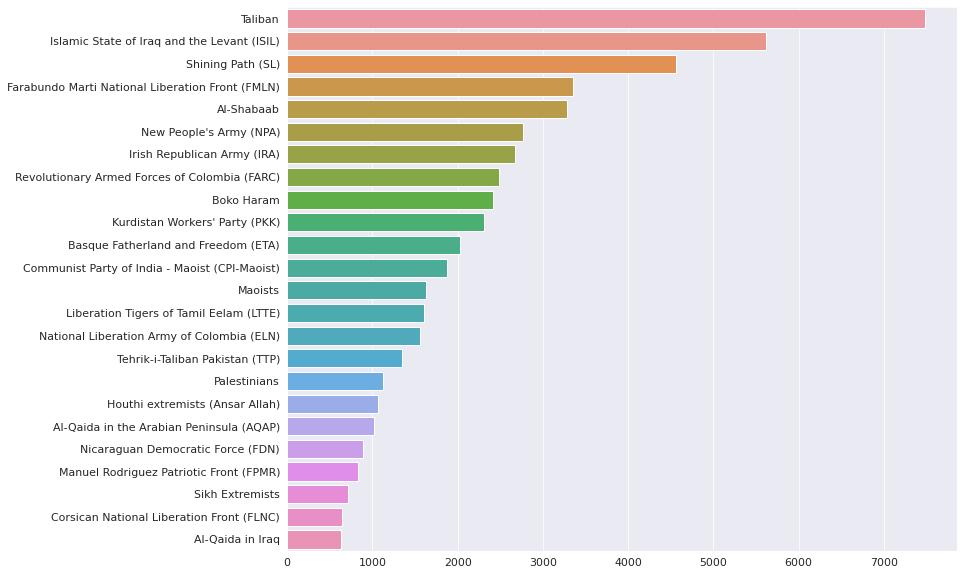

In [48]:
plt.rcParams['figure.figsize'] = (12, 10)
sns.barplot(data_new['perpetrator_group'].value_counts()[1:25].values,data_new['perpetrator_group'].value_counts()[1:25].index)
plt.show()

In [49]:
extended_attack_df = data_new[data_new['extended'] == 1]
non_extended_attack_df = data_new[~ (data_new['extended'] == 1)]

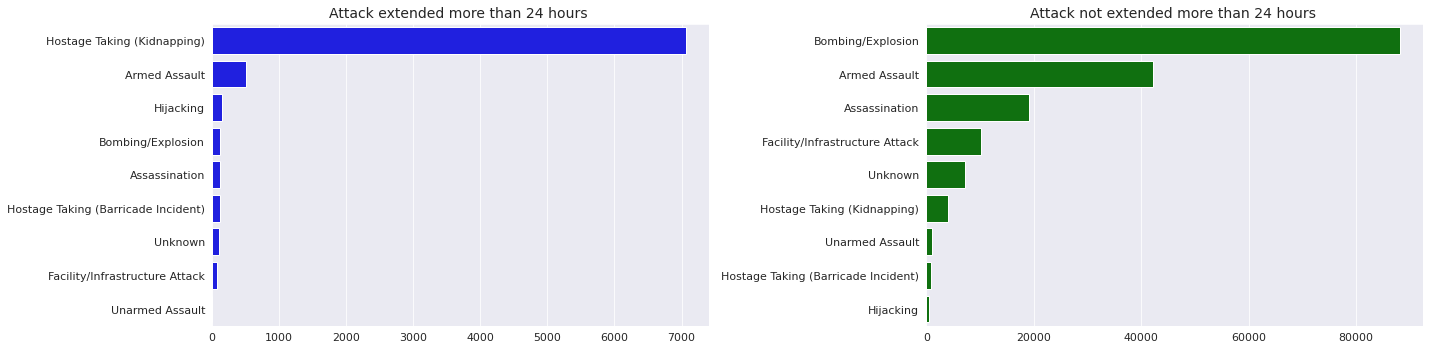

In [50]:
plt.figure(figsize=(20, 5))
ax1 = plt.subplot(121)
sns.barplot(extended_attack_df['attack_type'].value_counts().values,extended_attack_df['attack_type'].value_counts().index, color='blue')
ax1.set_title('Attack extended more than 24 hours ',size = 14)
ax2 = plt.subplot(122)
sns.barplot(non_extended_attack_df['attack_type'].value_counts().values,non_extended_attack_df['attack_type'].value_counts().index, color='green')
ax2.set_title('Attack not extended more than 24 hours ',size = 14)
plt.tight_layout()
plt.show()

In [51]:
data_new.columns

Index(['eventid', 'year', 'month', 'day', 'extended', 'country_name', 'region',
       'city', 'latitude', 'longitude', 'success', 'attack_type',
       'victim_cata', 'entity_name', 'specific_victim', 'victim_nationaliy',
       'victim_subtype_cata', 'perpetrator_group', 'weapon', 'num_fatalities',
       'num_injured', 'property'],
      dtype='object')

In [52]:
### top 10 coutreis faced higher property damage
property_damage = data_new[data_new.property  == 1] 

In [53]:
property_damage.groupby('country_name')['property'].sum().sort_values(ascending  =False)

country_name
Iraq                              8375
Pakistan                          6826
Colombia                          5034
India                             4881
Peru                              4836
                                  ... 
St. Kitts and Nevis                  1
Falkland Islands                     1
People's Republic of the Congo       1
New Hebrides                         1
Solomon Islands                      1
Name: property, Length: 199, dtype: int64